<a href="https://colab.research.google.com/github/data-better/RBOK/blob/main/RBOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. R의 소개

* 무료로 사용하는 데이터분석 소프트웨어 : R, Python
* R의 설치 : https://r-project.org
* R 개발환경 : Rstudio / Python 개발환경 : anaconda 
* 클라우드 기반 쥬피터 노트북 : 구글 Colab



## 2. 구글 Colab

* 구글 id가 있어야 이용 가능, 구글 drive 이용
* 텍스트와 코드로 구성 
  - 텍스트 작성 : 마크다운
  - 코드 수행 : Crtl+Enter, Shift+Enter, Alt+Enter 
* 크롬 브라우저에서 Python과 R을 실행 : R은 임시
  - 설치 필요하지 않음
  - GPU 무료 액세스
* Pyhon 기반 : https://colab.research.google.com/
* R : https://colab.research.google.com/notebook#create=true&language=r

## 3. R의 특징
  * Colab 환경 검토 : R.Version()
  * 설치된 library : library()
  * 설치된 data    : data()


In [ ]:
R.Version()

In [4]:
library()

In [3]:
help(package='base')

In [2]:
data()

In [5]:
?Syntax

In [57]:
options()

$add.smooth
[1] TRUE

$bitmapType
[1] "cairo"

$browser
[1] "xdg-open"

$browserNLdisabled
[1] FALSE

$callr.condition_handler_cli_message
function (msg) 
{
    custom_handler <- getOption("cli.default_handler")
    if (is.function(custom_handler)) {
        custom_handler(msg)
    }
    else {
        cli_server_default(msg)
    }
}
<bytecode: 0x5653b5533a48>
<environment: namespace:cli>

$CBoundsCheck
[1] FALSE

$check.bounds
[1] FALSE

$citation.bibtex.max
[1] 1

$continue
[1] "+ "

$contrasts
        unordered           ordered 
"contr.treatment"      "contr.poly" 

$cpp11_preserve_env
<environment: 0x5653b78d7bd0>

$crayon.enabled
[1] TRUE

$defaultPackages
[1] "datasets"  "utils"     "grDevices" "graphics"  "stats"     "methods"  

$demo.ask
[1] "default"

$deparse.cutoff
[1] 60

$device
function (filename = null_filename, ...) 
ok_device(filename, ...)
<bytecode: 0x5653b1fbf690>
<environment: 0x5653b1fbf230>

$device.ask.default
[1] FALSE

$digits
[1] 7

$dplyr.show_progress
[1]

## 4. R 기초

In [3]:
# 계산과 변수 지정

1+2
a = 10
b <- 2
a+b

[1] 3

[1] 12

In [6]:
# 데이터 형태
a1 = c(1,2,5)
print(a1)
b1 <- c(1,2, 'aa', TRUE)
print(b1)
c1 <- matrix(1:12, 4,3)
print(c1)

[1] 1 2 5
[1] "1"    "2"    "aa"   "TRUE"
     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12


## 5. 데이터 읽어오기

In [13]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
dataq = read_csv("https://raw.githubusercontent.com/data-better/RBOK/main/data/BOK_DATA_Q.csv")

In [37]:
# dataq_ts = ts(dataq, start=1985, frequency=4)
dataq_ts = dataq %>% ts(start=1985, frequency=4)
dataq_ts

## 6. 데이터 시각화

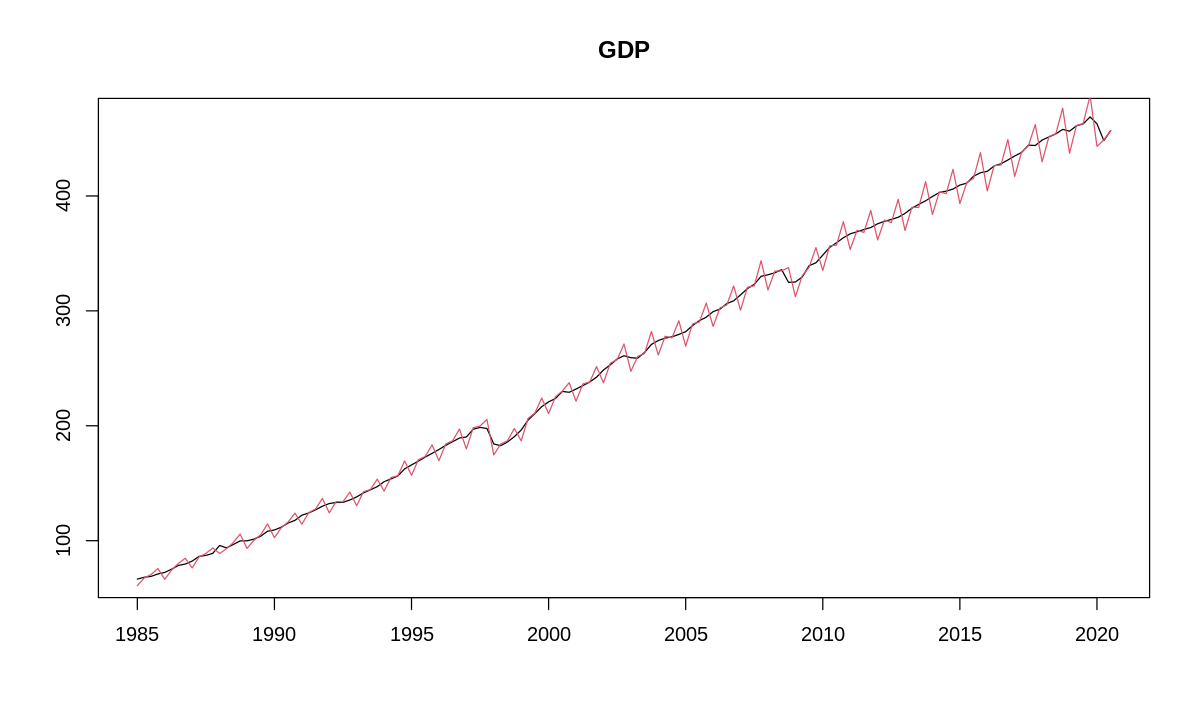

In [61]:
options(repr.plot.width = 10, repr.plot.height = 6)
plot(dataq_ts[,2]/1000, xlab="", ylab="", main="GDP")
 lines(dataq_ts[,4]/1000, col=2)

In [41]:
install.packages("forecast")
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



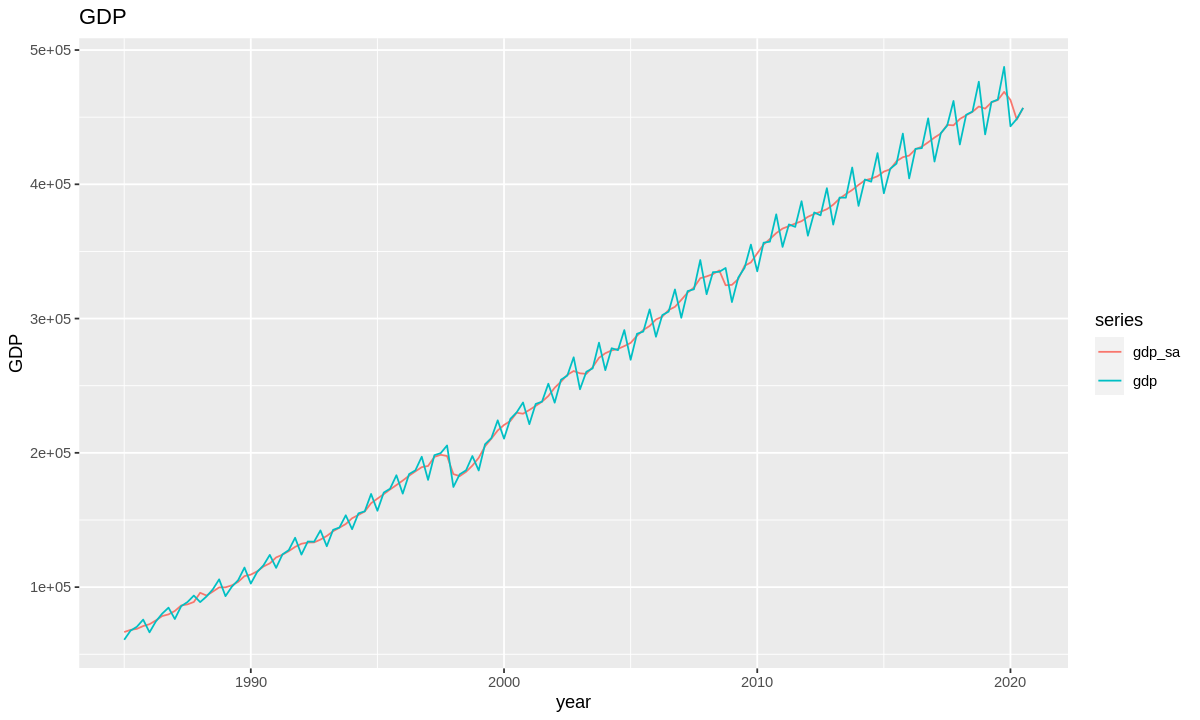

In [62]:
autoplot(dataq_ts[,c(2,4)])+
  ggtitle("GDP") +
  ylab("GDP") +
  xlab("year")

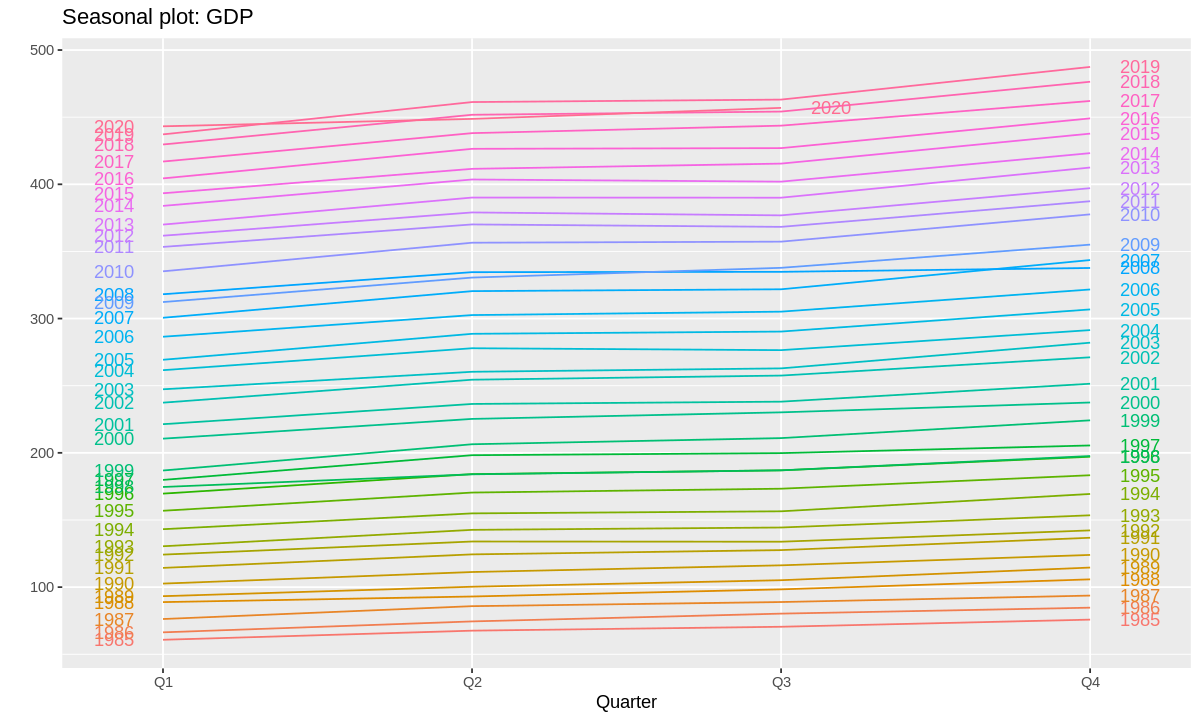

In [63]:
ggseasonplot(dataq_ts[,4]/1000, year.labels = TRUE, year.labels.left = TRUE) +
  ggtitle("Seasonal plot: GDP")

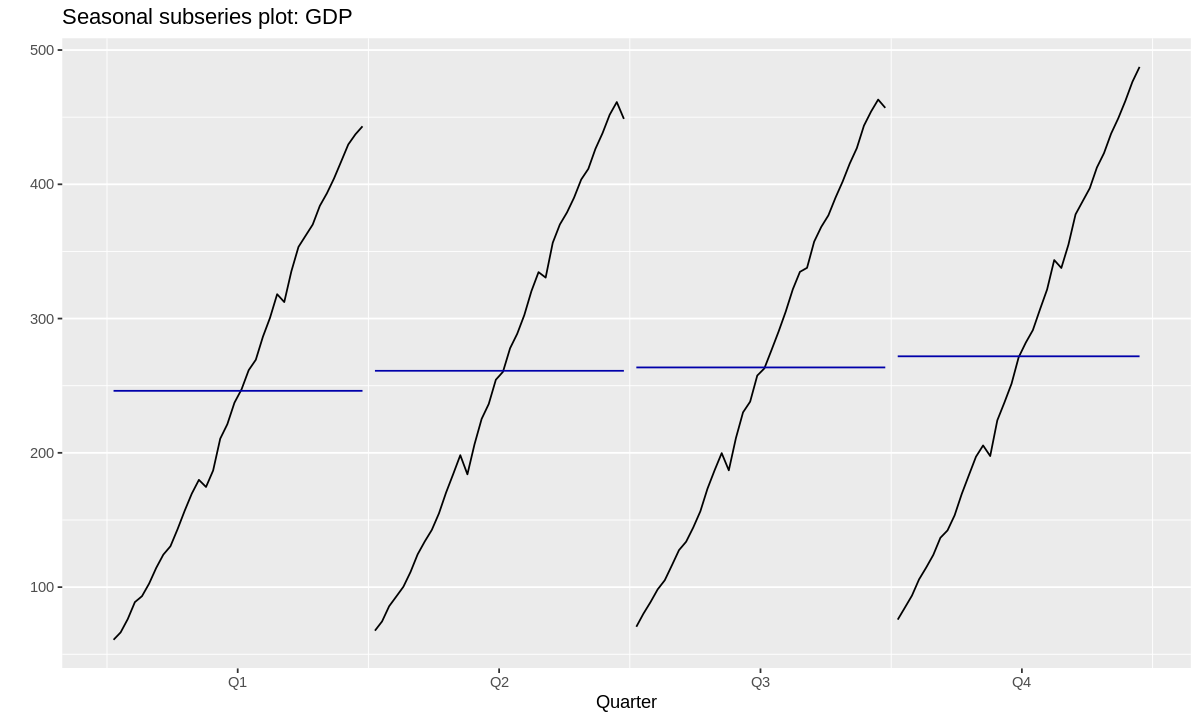

In [65]:
ggsubseriesplot(dataq_ts[,4]/1000) +
  ylab("") +
  ggtitle("Seasonal subseries plot: GDP")

In [79]:
library(dplyr)
gdp    = dataq_ts[,4]/1000
gdp_sa = dataq_ts[,2]/1000

gdp_sa_p = (gdp_sa - lag(gdp_sa)) / lag(gdp_sa) * 100
gdp_p    = (gdp    - lag(gdp, 12)) / lag(gdp, 12) * 100

ERROR: ignored

In [78]:
dplyr:lag(ts(gdp))


ERROR: ignored

## 7. 시계열의 분해